# **📊 Classification Tasks: Customer Churn Prediction**

This file contains the notebook demo for classification utils script example usages.

# **STAGE 0 : BUSINESS UNDERSTANDING**

## 📌 Problem Statement

A telecommunications company is experiencing significant customer attrition (churn), where existing customers discontinue their services and switch to competitors. The current reactive approach—addressing churn only after customers have already left—has proven costly and ineffective. Customer acquisition costs are typically 5-7x higher than retention costs, making each churned customer a substantial financial loss.

The company's customer service team relies on intuition and basic rules to identify at-risk customers, resulting in missed opportunities to intervene before customers leave. Without a data-driven approach, the company cannot effectively prioritize retention efforts or allocate resources efficiently.

Building on this challenge, the company aims to develop a predictive system that can identify customers at high risk of churning before they leave, enabling proactive retention strategies based on historical customer behavior and service usage patterns.

## 📌 Role

As a Data Scientist Team, our role involves:

- Conducting exploratory data analysis to understand customer behavior patterns
- Identifying key factors that contribute to customer churn
- Building predictive models to flag at-risk customers
- Providing actionable insights for business decision-making

## 📌 Goals

- **Proactive Churn Prevention**: Identify at-risk customers before they churn to enable timely intervention. (_MAIN_)
- **Customer Lifetime Value Optimization**: Focus retention efforts on high-value customers most likely to churn. (_SECONDARY_)
- **Resource Allocation Efficiency**: Prioritize marketing and retention budgets toward customers who need it most. (_SECONDARY_)

## 📌 Business Metrics

| Metric                            | Description                                               | Type        |
| --------------------------------- | --------------------------------------------------------- | ----------- |
| **Churn Rate (%)**                | Percentage of customers who churned in a given period     | _MAIN_      |
| **Customer Retention Rate (%)**   | Percentage of customers retained after intervention       | _MAIN_      |
| **Customer Lifetime Value (CLV)** | Projected revenue from a customer over their relationship | _SECONDARY_ |
| **Cost per Acquisition (CPA)**    | Cost to acquire a new customer vs. retain existing        | _SECONDARY_ |

## 📌 Objectives

The ultimate goal of this project is to create a machine learning model that can:

- Predict customer churn with high recall to minimize missed at-risk customers (false negatives are costly)
- Provide probability scores for churn risk to enable tiered intervention strategies
- Identify the top contributing factors to churn for targeted retention campaigns

## 📌 Success Criteria

- Model achieves **Recall ≥ 80%** for churn class (minimize false negatives)
- Model achieves **Precision ≥ 60%** to avoid excessive false alarms
- Reduction in monthly churn rate by **15-20%** through proactive interventions
- Clear identification of **top 5 churn indicators** for actionable insights

# **STAGE 1 : EXPLORATORY DATA ANALYSIS (EDA)**

## Project Setup

In [1]:
import os
import sys
from pathlib import Path

# # Add root folder to path (for module imports) --> solved to using hatchling in pyproject.toml
# sys.path.insert(0, str(Path.cwd().parent))

# Change working directory (for I/O operations)
os.chdir(Path.cwd().parent)

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_recall_fscore_support

# Import utils scripts
from utils.preprocessing import *
from utils.visualization import *
from utils.statistics import *
from utils.feature_selection import *

## Data Understanding & Initial Transformation

In [3]:
# # Read data from local
# df_raw = pd.read_csv('data/classification_data.csv')

# Read data from github
df_raw = pd.read_csv('https://raw.githubusercontent.com/mcikalmerdeka/ds-dataprep-utils/refs/heads/main/data/classification_data.csv')

# Preview data
display(df_raw.sample(10))

,customer_id,age,gender,tenure_months,monthly_charges,total_charges,contract_type,payment_method,support_tickets,account_balance,internet_service,online_security,satisfaction_score,days_since_last_login,num_products,referral_source,churn,churn_label
152,CUST_00286,37.0,Female,16.0,51.794045,843.762153,Month-to-month,Mailed Check,1,221.826699,DSL,yes,3.6,11.0,2,Friend,0,No
48,CUST_00465,36.0,Female,0.0,60.014188,0.000000,One year,Credit Card,1,80.558047,DSL,Yes,1.9,NaN,1,Google,1,Yes
548,CUST_00904,42.0,FEMALE,19.0,105.419227,NaN,Month-to-month,Mailed Check,2,-11.053291,DSL,Yes,NaN,13.0,1,Friend,0,No
768,CUST_00348,29.0,Male,1.0,79.721711,79.574936,monthly,Bank Transfer,0,-81.148154,Fiber optic,True,3.8,6.0,1,Instagram,1,Yes
670,CUST_00157,47.0,Female,10.0,65.474869,655.129140,Month-to-month,Bank Transfer,2,10.774813,DSL,Yes,1.9,21.0,1,TV Ad,1,Yes
151,CUST_00334,54.0,Female,24.0,96.074638,2231.704607,One year,Bank Transfer,3,27.974800,Fiber optic,Yes,2.5,11.0,2,Facebook,0,No
949,CUST_00187,38.0,Male,3.0,38.738668,113.284293,Month-to-month,Electronic Check,0,62.597047,Fiber optic,Yes,5.0,3.0,1,Twitter,0,No
617,CUST_00124,48.0,Male,4.0,-128.624723,496.175824,Two year,Mailed Check,1,-1.431944,Fiber optic,Yes,2.7,NaN,2,Google,0,No
796,CUST_00637,41.0,Female,18.0,127.342573,2347.587068,Two year,Credit Card,1,-134.614072,DSL,Yes,3.5,37.0,4,Instagram,0,No
317,CUST_00534,NaN,FEMALE,15.0,NaN,1020.746629,Two year,Bank Transfer,4,148.445909,DSL,yes,3.9,6.0,3,Email,0,No


In [4]:
# Checking shape of dataframe
print(f'Number of rows: {df_raw.shape[0]}')
print(f'Number of columns {df_raw.shape[1]}')

Number of rows: 1050
Number of columns 18


In [5]:
# Check data information
info_df = check_data_information(df_raw, df_raw.columns.tolist())
display(info_df)

,Feature,Data Type,Null Values,Null Percentage,Zero Values,Zero Percentage,Negative Values,Negative Percentage,Empty Strings,Numeric in Object,Duplicated Values,Unique Values,Cardinality Ratio,Unique Sample
0,customer_id,object,0,0.00,0,0.00,0,0.00,0,0,50,1000,0.9524,"CUST_00352, CUST_00689, CUST_00485, CUST_00388..."
1,age,float64,91,8.67,0,0.00,9,0.86,0,0,50,81,0.0771,"52.0, 46.0, 18.0, 54.0, 67.0"
2,gender,object,0,0.00,0,0.00,0,0.00,0,0,50,5,0.0048,"Female, Male, Other, FEMALE, male"
3,tenure_months,float64,92,8.76,45,4.29,0,0.00,0,0,50,96,0.0914,"13.0, 81.0, 44.0, 9.0, 0.0"
4,monthly_charges,float64,88,8.38,0,0.00,38,3.62,0,0,50,914,0.8705,"64.39311525514046, 115.10259485286996, 74.2107..."
5,total_charges,float64,94,8.95,46,4.38,11,1.05,0,0,50,866,0.8248,"873.447527076971, 9634.748150896536, 3291.8160..."
6,contract_type,object,7,0.67,0,0.00,0,0.00,0,0,50,4,0.0038,"Two year, One year, Month-to-month, monthly, nan"
7,payment_method,object,60,5.71,0,0.00,0,0.00,0,0,50,4,0.0038,"Bank Transfer, Electronic Check, Credit Card, ..."
8,support_tickets,int64,0,0.00,139,13.24,0,0.00,0,0,50,8,0.0076,"1, 4, 2, 0, 3"
9,account_balance,float64,0,0.00,0,0.00,534,50.86,0,0,50,1000,0.9524,"58.9503049877248, -25.965240829469444, 133.015..."


In [41]:
# Count total of null values
print(f"Total null values: {df_raw.isnull().sum().sum()}")

Total null values: 669


Feature Information:

| Feature                 | Description                           | Type        | **Specific Data Type** |
| ----------------------- | ------------------------------------- | ----------- | ---------------------- |
| `customer_id`           | Unique customer identifier            | ID          | Nominal                 |
| `age`                   | Customer age                          | Numeric     | Continuous             |
| `gender`                | Customer gender                       | Categorical | Nominal                |
| `tenure_months`         | Months as a customer                  | Numeric     | Discrete               |
| `monthly_charges`       | Monthly billing amount                | Numeric     | Continuous             |
| `total_charges`         | Cumulative charges                    | Numeric     | Continuous             |
| `contract_type`         | Service contract type                 | Categorical | Ordinal                |
| `payment_method`        | Payment method used                   | Categorical | Nominal                |
| `support_tickets`       | Number of support requests            | Numeric     | Discrete               |
| `account_balance`       | Current account balance               | Numeric     | Continuous             |
| `internet_service`      | Type of internet service              | Categorical | Nominal                |
| `online_security`       | Has online security add-on            | Categorical | Nominal                |
| `satisfaction_score`    | Customer satisfaction (1-5)           | Numeric     | Continuous             |
| `days_since_last_login` | Engagement metric                     | Numeric     | Continuous             |
| `num_products`          | Number of products subscribed         | Numeric     | Discrete               |
| `referral_source`       | How customer was acquired             | Categorical | Nominal                |
| **`churn`**             | **Target: Did customer churn? (0/1)** | **Binary**  | Nominal                |

In [42]:
# Group columns by data type
nums_cols = df_raw.select_dtypes(include=['int64', 'float64']).columns
cats_cols = df_raw.select_dtypes(include=['object', 'category']).columns

# Create a copy for the raw dataframe
df = df_raw.copy()

In [43]:
# # Checking unique values for each categorical columns (for more detail value checking)
for col in cats_cols:
    print()
    print(f"{col}: {df[col].unique()}")


customer_id: ['CUST_00352' 'CUST_00689' 'CUST_00485' 'CUST_00388' 'CUST_00031'
 'CUST_00442' 'CUST_00198' 'CUST_00425' 'CUST_00107' 'CUST_00714'
 'CUST_00552' 'CUST_00675' 'CUST_00158' 'CUST_00475' 'CUST_00423'
 'CUST_00922' 'CUST_00617' 'CUST_00483' 'CUST_00884' 'CUST_00650'
 'CUST_00244' 'CUST_00847' 'CUST_00982' 'CUST_00828' 'CUST_00570'
 'CUST_00059' 'CUST_00290' 'CUST_00070' 'CUST_00344' 'CUST_00184'
 'CUST_00141' 'CUST_00390' 'CUST_00491' 'CUST_00826' 'CUST_00101'
 'CUST_00749' 'CUST_00551' 'CUST_00306' 'CUST_00986' 'CUST_00321'
 'CUST_00799' 'CUST_00730' 'CUST_00677' 'CUST_00653' 'CUST_00076'
 'CUST_00192' 'CUST_00086' 'CUST_00458' 'CUST_00465' 'CUST_00918'
 'CUST_00554' 'CUST_00309' 'CUST_00743' 'CUST_00873' 'CUST_00398'
 'CUST_00616' 'CUST_00049' 'CUST_00199' 'CUST_00598' 'CUST_00969'
 'CUST_00882' 'CUST_00428' 'CUST_00497' 'CUST_00603' 'CUST_00010'
 'CUST_00888' 'CUST_00670' 'CUST_00937' 'CUST_00928' 'CUST_00557'
 'CUST_00636' 'CUST_00833' 'CUST_00371' 'CUST_00834' 'CUST_005

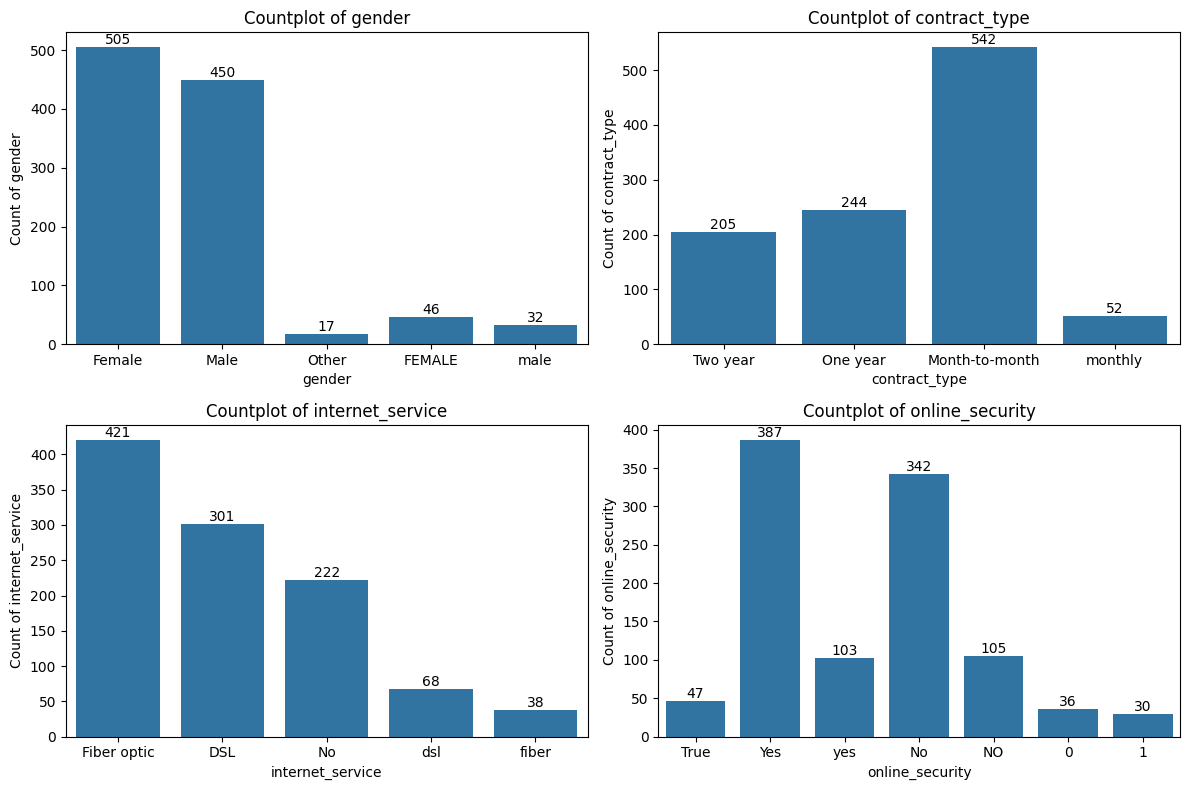

In [44]:
# # Quick check on the categorical distribution for problematic columns
columns_to_check = ["gender", "contract_type", "internet_service", "online_security"]

# for col in columns_to_check:
#     print(f"Distribution of {col}:")
#     print(df[col].value_counts())
#     print()

# Using the utils function
plot_dynamic_countplot(df, columns_to_check, ncols=2, figsize=(12, 8))

In [52]:
# Initial preprocessing of normalizing categorical values

## Handle gender column values
df["gender"] = df["gender"].replace({"FEMALE": "Female", "male": "Male", "Other": "Male"})

## Handle internet_service column values
df["internet_service"] = df["internet_service"].replace({"fiber": "Fiber Optic", "Fiber optic": "Fiber Optic", "dsl": "DSL"})

## Handle contract_type column values
df["contract_type"] = df["contract_type"].replace({"Month-to-month": "Monthly", "monthly": "Monthly", "one_year": "Yearly", "two_year": "Yearly"})

## Handle online_Security column values
df["online_security"] = df["online_security"].replace(
    {"True": "Yes", "yes": "Yes", "NO": "No", "no": "No", "0": "No", "1": "Yes"})

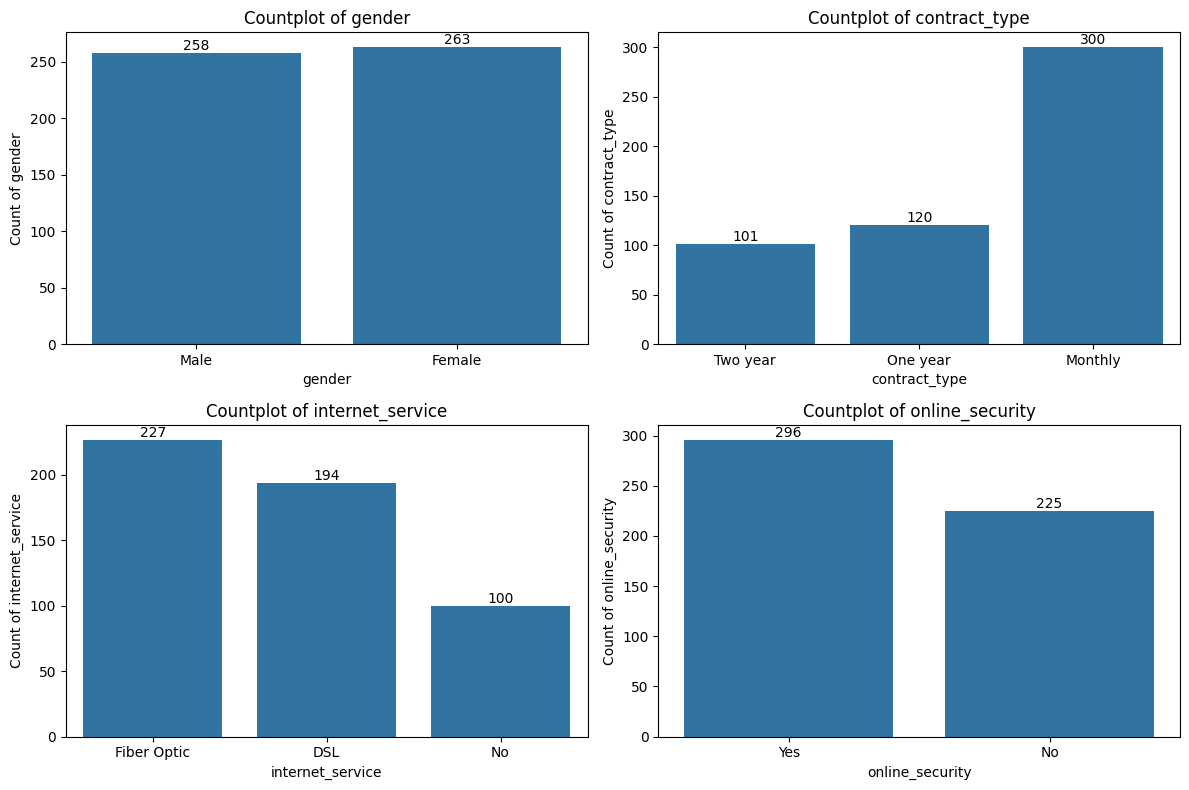

In [53]:
# Re-check after transformation
plot_dynamic_countplot(df, columns_to_check, ncols=2, figsize=(12, 8))

In [49]:
# Initial data preprocessing of drop duplicates and null values

## Drop duplicated values
df = df.drop_duplicates()

## Drop null values
null_cols = df.columns[df.isnull().any()].tolist()
df, _ = handle_missing_values(
    data=df,
    strategy="remove",
    columns=null_cols,
)

# **STAGE 2 : DATA PRE-PROCESSING**

# **STAGE 3 : MODELLING AND EVALUATION**

# **STAGE 4 : Business Impact Simulation**